<a href="https://colab.research.google.com/github/thainguyen222/KHDLUD_NHOM1/blob/main/Report_KHDLUD_NHOM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Báo cáo đồ án môn "Khoa học dữ liệu ứng dụng"



## Giới thiệu nhóm 

Nhóm 1:
1. 1612571 - Trần Tiến Sỹ - AllenAlexander98
2. 1612607 - Nguyễn Quang Thái - thainguyen222
3. 18120228	- Huỳnh Nhựt Quang - huynhnhutquang7

Giáo viên hướng dẫn: Trần Trung Kiên 

Link đề bài: https://www.kaggle.com/c/how-much-did-it-rain-ii

Link solution: http://simaaron.github.io/Estimating-rainfall-from-weather-radar-readings-using-recurrent-neural-networks/

Link github: https://github.com/thainguyen222/KHDLUD_NHOM1

Link phân công: https://docs.google.com/spreadsheets/d/1FguyZ20RIyjhaFmaqdTNhn6xAX--IwD6QrC00v7xmnY/edit#gid=0

## Mô tả bài toán 

### Thông Tin Về Cuộc Thi


*   Tên Cuộc Thi: How Much Did It Rain ? II
*   Được the Artificial Intelligence Committee of the American Meteorological Society và trao thưởng bởi Climate Corporation với giá trị $500. Cuộc thi có tổng cộng 588 nhóm tham gia.

### Mô tả bài toán

**Giới Thiệu Bài Toán**

  Bài toán dự đoán về lượng mưa ở các bang trung và tây Mỹ vào tháng tư đến tháng tám năm 2014, dựa vào số liệu ghi lại từ radar phân cực.

  Lượng mưa luôn là một hiện tượng thay đổi theo không gian và thời gian, cho nên việc đo lường lượng mưa cũng nổi tiếng là khó khăn để đo chính xác. Đồng hồ đo mưa là một công cụ có thể đo chính xác và hiệu quả, tuy nhiên không dễ dàng để đặt chúng ở khắp mọi nơi. Vì vậy, để bao phủ một phạm vi rộng lớn , người ta dùng đến radar thời tiết để dự báo, tuy nhiên sai lệch giữa dự báo dựa trên radar thời tiết và thực tế thì khá là cao. Gần đây, để cải thiện khả năng dự báo lượng mưa, the U.S National Weather Service đã nâng cấp mạng lưới radar của họ thành các radar phân cực. Điều này tạo nên độ chính xác cao hơn cho việc dự báo lượng mưa.
Trong cuộc thi này, người tham gia sẽ nhận được số liệu từ các radar phân cực (22 features), từ đó dự đoán ra tổng lượng mưa theo giờ (tại 1 vị trí ngay 1 thời điểm trong 1 giờ).

**Input**

Các thông số từ radar phân cực được ghi nhận tại các đồng hồ đo thực tế.

**Output**

Tổng lượng mưa tại các đồng hồ đo thực tế tại cuối mỗi giờ (tính bằng mm).

**Ý Nghĩa**

Dùng để kiểm tra lượng mưa tại một vị trí trong một thời điểm bất kỳ dựa vào các thông số từ radar phân cực.

### Mô tả dữ liệu


Dữ liệu training đào tạo bao gồm dữ liệu NEXRAD và MADIS thu thập vào 20 ngày giữa tháng Tư và tháng Tám của năm 2014 tại các bang trồng ngô miền trung và tây nước Mỹ. Thông tin về thời gian và địa điểm đã được che đi, và được xáo trộn để chúng không được sắp xếp theo thứ tự thời gian và địa điểm (nhưng vẫn giữ được tính liên tục và thứ tự của dữ liệu trong một giờ thông qua thuộc tính minutes_past). Dữ liệu test gồm dữ liệu từ các radar và máy đo giống nhau trong những ngày còn lại trong tháng.

**Training dataset**

Các thông số được ghi lại của radar tại các máy đo ở Trung Tây Hoa Kỳ trong 20 ngày mỗi tháng trong mùa trồng ngô (tháng tư đến tháng tám). Ta cũng được cung cấp thông số máy đo vào cuối mỗi giờ. 

**Test dataset**

Tương tự như Training dataset, các thông số được ghi lại của radar tại các máy đo ở Trung Tây Hoa Kỳ trong 10 hoặc 11 ngày còn lại mỗi tháng trong mùa trồng ngô (tháng tư đến tháng tám) tương ứng với Training dataset. Ta cần dự đoán thông số của máy đo lượng mưa tại cuối mỗi giờ (tính bằng mm).

**Đánh giá**

Ở cuộc thi này, người ta dùng độ đo Mean Absolute Error (MAE).


### Mô tả file 

Cần chú ý, có nhiều quan sát radar trong suốt một giờ tại một điểm, và chỉ có một quan sát máy đo lượng mưa ở cuối giờ được tính (cột the Expected) được tính. Vì vậy, sẽ có nhiều dòng trùng "Id" với nhau

Các cột trong dữ liệu:
- Id: là số để phân biệt từng bộ quan sát suốt một giờ, tại một máy đo.
- minutes_past: đối với một bộ quan sát radar, minutes_past là thời gian mà radar đó đã quan sát tính theo phút từ đầu giờ. 
- radardist_km: Khoảng cách của máy đo từ radar có các quan sát đang được báo cáo.
- Ref:  Hệ số phản xạ của radar tính bằng km.
- Ref_5x5_10th: Phần trăm giá trị hệ số phản xạ thứ 10 trong vùng lân cận 5x5 xung quanh thước đo.
- Ref_5x5_50th: Phần trăm giá trị hệ số phản xạ thứ 50 trong vùng lân cận 5x5 xung quanh thước đo.
- Ref_5x5_90th: Phần trăm giá trị hệ số phản xạ thứ 90 trong vùng lân cận 5x5 xung quanh thước đo.
- RefComposite: Hệ số phản xạ tối đa trong cột dọc phía trên thước đo. Tính bằng dBZ.
- RefComposite_5x5_10th
- RefComposite_5x5_50th
- RefComposite_5x5_90th
- RhoHV: Hệ số tương quan (không đơn vị) 
- RhoHV_5x5_10th
- RhoHV_5x5_50th
- RhoHV_5x5_90th
- Zdr: Hệ số phản xạ vi sai tính bằng dB
- Zdr_5x5_10th
- Zdr_5x5_50th
- Zdr_5x5_90th
- Kdp: Pha vi sai cụ thể (độ/km)
- Kdp_5x5_10th
- Kdp_5x5_50th
- Kdp_5x5_90th
- Expected: (chỉ số ta cần dự đoán) số mm tại đồng hồ đo thực tế quan sát cuối mỗi giờ.

## Giải quyết bài toán 

### Chuẩn bị môi trường 


Cài đặt các gói và import các thư viện python cần thiết cho mô hình

In [1]:
!pip install PyDrive > /dev/null

In [2]:
import pandas as pd
import numpy as np
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

### Đọc dữ liệu 

#### Xác thực từ Google Drive

Xác thực tài khoàn Google Drive chứa file train và test 

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#### Đọc file train 

Input: file csv

Output: dataframe pandas

In [4]:
downloaded_train = drive.CreateFile({'id':"1XKFG6pu76wh8GNcVSAdRoLB8MEtRjXwn"})   
downloaded_train.GetContentFile('train.csv')  

In [5]:
train_df = pd.read_csv('train.csv')
train_df

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,1,3,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
1,1,16,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
2,1,25,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
3,1,35,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
4,1,45,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13765196,1180945,38,9.0,33.0,19.5,25.5,36.5,33.0,20.5,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.636004
13765197,1180945,42,9.0,33.0,21.0,30.5,37.0,36.5,22.0,33.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.636004
13765198,1180945,47,9.0,29.5,10.0,26.0,30.5,31.0,16.5,26.0,...,1.051667,1.75,NaN,0.750,3.0000,13.379990,NaN,NaN,13.379990,8.636004
13765199,1180945,52,9.0,19.0,NaN,15.5,26.5,19.0,NaN,16.5,...,1.051667,NaN,NaN,NaN,2.8125,NaN,NaN,NaN,NaN,8.636004


#### Đọc file test 

Input: file csv

Output: dataframe pandas

In [6]:
downloaded_test = drive.CreateFile({'id':"1JdRKEhpugVN-NL3Sp9yzVTQxYedmQ6r8"})   
downloaded_test.GetContentFile('test.csv') 

In [7]:
test_df = pd.read_csv('test.csv')
test_df

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th
0,1,1,8.0,NaN,NaN,NaN,14.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,5,8.0,10.0,NaN,10.0,18.0,11.5,NaN,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,8,8.0,NaN,NaN,7.0,14.5,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,12,8.0,14.0,NaN,9.0,16.0,14.0,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,15,8.0,10.5,NaN,9.0,15.5,13.5,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8022751,717625,40,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8022752,717625,44,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8022753,717625,48,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8022754,717625,52,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Đặc điểm dữ liệu 

##### Kích thước file

In [9]:
size_train = os.path.getsize('train.csv') 
print('Kích thước của file train là:', size_train/1000000, 'Mb')
size_test = os.path.getsize('test.csv') 
print('Kích thước của file test là:', size_test/1000000, 'Mb')
print("Tỉ lệ kích thước file train/test:")
print(size_train/size_test)

Kích thước của file train là: 1248.430084 Mb
Kích thước của file test là: 648.404519 Mb
Tỉ lệ kích thước file train/test:
1.9253876976758084


##### Số dòng 

In [10]:
print("Số dòng và cột trong tập train:")
print(train_df.shape)
print("Số dòng và cột trong tập test:")
print(test_df.shape)
print("Tỉ lệ dòng train/test:")
print(train_df.shape[0]/test_df.shape[0])

Số dòng và cột trong tập train:
(13765201, 24)
Số dòng và cột trong tập test:
(8022756, 23)
Tỉ lệ dòng train/test:
1.7157696183206868


##### Số giờ 

In [11]:
print("Số lượng giờ trong tập train")
print(train_df.Id.max())
print("Số lượng giờ trong tập test")
print(test_df.Id.max())
print("Tỉ lệ giờ train/test:")
print(train_df.Id.max()/test_df.Id.max())

Số lượng giờ trong tập train
1180945
Số lượng giờ trong tập test
717625
Tỉ lệ giờ train/test:
1.645629681240202


### Tiền xử lí dữ liệu

#### Xử lí tập train 

##### Ép kiểu dữ liệu 




Ép kiểu dataframe để giảm bộ nhớ lưu trữ

Input: dataframe

Output: dataframe đã được ép kiểu float 32 bit

In [12]:
train_df[train_df.columns[1:]] = train_df[train_df.columns[1:]].astype(np.float32)

##### Cắt bớt dữ liệu 


Loại bỏ những dòng không có giá trị trong cột Ref

Input: dataframe

Output: dataframe đã lọc bỏ các dòng có Ref rỗng

In [13]:
good_ids = set(train_df.loc[train_df['Ref'].notna(), 'Id'])
train_df = train_df[train_df['Id'].isin(good_ids)]
print("Kích thước dataframe sau khi cắt bớt:")
train_df.shape

Kích thước dataframe sau khi cắt bớt:


(9125329, 24)

##### Điền chỗ thiễu


Điền những chỗ thiếu trong dữ liệu bằng 0 để mô hình có thể xử lí 

Input: dataframe

Output: dataframe đã điền chỗ thiếu 

In [14]:
train_df.fillna(0.0, inplace=True)
train_df.reset_index(drop=True, inplace=True)
train_df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,2,1.0,2.0,9.0,5.0,7.5,10.5,15.0,10.5,16.5,...,0.998333,0.3750,-0.1250,0.3125,0.8750,1.059998,-1.410004,-0.350006,1.059998,1.016001
1,2,6.0,2.0,26.5,22.5,25.5,31.5,26.5,26.5,28.5,...,1.005000,0.0625,-0.1875,0.2500,0.6875,0.000000,0.000000,0.000000,1.409988,1.016001
2,2,11.0,2.0,21.5,15.5,20.5,25.0,26.5,23.5,25.0,...,1.001667,0.3125,-0.0625,0.3125,0.6250,0.349991,0.000000,-0.350006,1.759995,1.016001
3,2,16.0,2.0,18.0,14.0,17.5,21.0,20.5,18.0,20.5,...,1.001667,0.2500,0.1250,0.3750,0.6875,0.349991,-1.059998,0.000000,1.059998,1.016001
4,2,21.0,2.0,24.5,16.5,21.0,24.5,24.5,21.0,24.0,...,0.998333,0.2500,0.0625,0.1875,0.5625,-0.350006,-1.059998,-0.350006,1.759995,1.016001


##### Lọc dữ liệu không đáng tin cậy 


Lọc bỏ những giờ đo mà có lượng mưa >= THRESHOLD (điều này rất có thể là do lỗi của máy đo bị kẹt, bị lỗi, ...). Những dữ liệu này có thể ảnh hưởng rất lớn đến kết quả đầu ra. Giá trị THRESHOLD được tác giả chọn sau khi thử qua nhiều giá trị khác nhau.

Input: dataframe
Output: dataframe sau khi lọc dữ liệu không đáng tin cậy

In [15]:
THRESHOLD = 73 
train_df = train_df[train_df['Expected'] < THRESHOLD]
print("Lượng dữ liệu sau khi lọc: ")
train_df.shape

Lượng dữ liệu sau khi lọc: 


(8926102, 24)

##### Chuyển dữ liệu thành matrix

Tính số lần đo nhiều nhất trong một giờ

In [16]:
train_groups = train_df.groupby("Id")
train_size = len(train_groups)
MAX_SEQ_LEN = train_groups.size().max()
print("Số lần đo nhiều nhất trong một giờ là:", MAX_SEQ_LEN)

Số lần đo nhiều nhất trong một giờ là: 19


Trong phần này, ta cần gộp các lần đo cùng giờ (id) thành một ma trận với số dòng là MAX_SEQ_LEN=19 và số cột là N_FEATURES=22 để cho vào đầu vào của mạng RNN, phục vụ cho tính xử lí theo chuỗi của mạng này. 

Mỗi dòng tương đương với một lần đo, những giờ không đủ 19 lần đo được lấp đầy bởi giá trị 0. N_FEATURES=22 là số feature trong tập train bỏ đi cột id và expected.

In [17]:
N_FEATURES = 22
X_train = np.zeros((train_size, MAX_SEQ_LEN, N_FEATURES), dtype=np.float32)
y_train = np.zeros(train_size, dtype=np.float32)

i = 0
for _, group in train_groups:
    X = group.values
    seq_len = X.shape[0]
    X_train[i,:seq_len,:] = X[:,1:23]
    y_train[i] = X[0,23]
    i += 1
    del X
    
del train_groups

In [ ]:
print("Dữ liệu sau khi chuyển đổi thành ma trận")
X_train.shape, y_train.shape

Dữ liệu sau khi chuyển đổi thành ma trận


((714838, 19, 22), (714838,))

Một ma trận chứa các dòng là các lần đo trong cùng một giờ, đối với các giờ không đủ 19 lần đo, các dòng đó sẽ bằng 0

In [ ]:
X_train[0]

array([[ 1.        ,  2.        ,  9.        ,  5.        ,  7.5       ,
        10.5       , 15.        , 10.5       , 16.5       , 23.5       ,
         0.99833333,  0.99833333,  0.99833333,  0.99833333,  0.375     ,
        -0.125     ,  0.3125    ,  0.875     ,  1.0599976 , -1.4100037 ,
        -0.3500061 ,  1.0599976 ],
       [ 6.        ,  2.        , 26.5       , 22.5       , 25.5       ,
        31.5       , 26.5       , 26.5       , 28.5       , 32.        ,
         1.0016667 ,  0.9816667 ,  0.99833333,  1.005     ,  0.0625    ,
        -0.1875    ,  0.25      ,  0.6875    ,  0.        ,  0.        ,
         0.        ,  1.4099884 ],
       [11.        ,  2.        , 21.5       , 15.5       , 20.5       ,
        25.        , 26.5       , 23.5       , 25.        , 27.        ,
         1.0016667 ,  0.995     ,  0.99833333,  1.0016667 ,  0.3125    ,
        -0.0625    ,  0.3125    ,  0.625     ,  0.34999084,  0.        ,
        -0.3500061 ,  1.7599945 ],
       [16.        

#### Xử lí tập test

##### Ép kiểu dữ liệu  

In [ ]:
test_df[test_df.columns[1:]] = test_df[test_df.columns[1:]].astype(np.float32)

##### Điền chỗ thiễu 

In [ ]:
test_ids = test_df['Id'].unique()
test_df = test_df.fillna(0.0)
test_df = test_df.reset_index(drop=True)

##### Chuyển dữ liệu thành matrix

In [ ]:
test_groups = test_df.groupby("Id")
test_size = len(test_groups)

X_test = np.zeros((test_size, MAX_SEQ_LEN, N_FEATURES), dtype=np.float32)

i = 0
for _, group in test_groups:
    X = group.values
    seq_len = X.shape[0]
    X_test[i,:seq_len,:] = X[:,1:23]
    i += 1
    del X
    
del test_groups

In [ ]:
print("Dữ liệu sau khi chuyển đổi thành ma trận")
X_test.shape

Dữ liệu sau khi chuyển đổi thành ma trận


(717625, 19, 22)

Sau khi chuyển sang ma trận, xóa bỏ data cũ

In [ ]:
del train_df
del test_df

### Mô hình áp dụng 

#### Quá trình phát triển mô hình RNN

Mạng nơ-ron hồi quy (RNN - Recurrent Neural Network) là một thuật toán được chú ý rất nhiều trong thời gian gần đây bởi các kết quả tốt thu được trong lĩnh vực xử lý ngôn ngữ tự nhiên.

Ý tưởng chính của RNN (Recurrent Neural Network) là sử dụng chuỗi các thông tin. Trong các mạng nơ-ron truyền thống tất cả các đầu vào và cả đầu ra là độc lập với nhau. Tức là chúng không liên kết thành chuỗi với nhau. Cứ 1 mẫu dữ liệu thì giữa các features, thứ tự của các feature không có ảnh hưởng đến kết quả đầu ra. Nhưng với mạng RNN, các features sẽ xâu chuỗi lại với nhau theo đúng thứ tự.

RNN được gọi là hồi quy (Recurrent) bởi lẽ chúng thực hiện cùng một tác vụ cho tất cả các phần tử của một chuỗi với đầu ra phụ thuộc vào cả các phép tính trước đó. Nói cách khác, RNN có khả năng nhớ các thông tin được tính toán trước đó. Trên lý thuyết, RNN có thể sử dụng được thông tin của một văn bản rất dài, tuy nhiên thực tế thì nó chỉ có thể nhớ được một vài bước trước đó mà thôi.

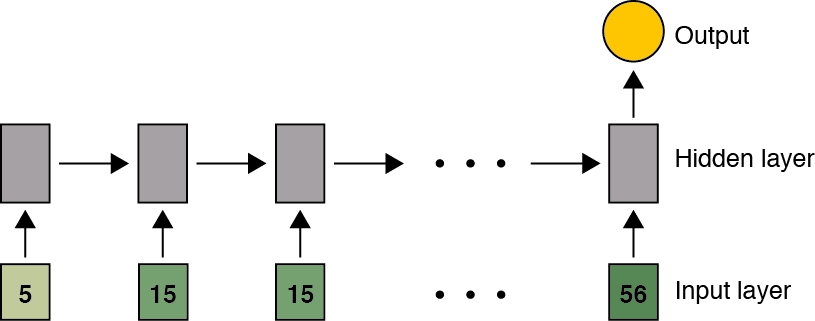

Basic many-to-one RNN.

RNN về cơ bản hoạt động như một máy tích hợp và được sử dụng theo kiểu many-to-one.

Bỏ qua định luật trọng lực và không đề cập đến định luật thứ hai của nhiệt động lực học, không có gì ngăn cản chúng ta xem vấn đề như mưa bay lên từ các máy đo mưa trên mặt đất và tự hoàn nguyên như những đám mây. Do đó, chúng tôi có thể giới thiệu một hướng ngược lại và xem xét một RNN hai chiều:

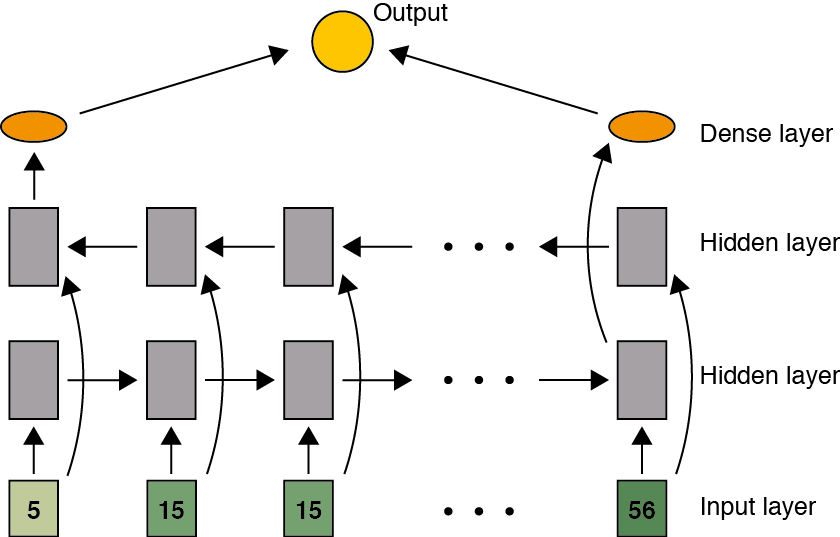


Một lớp kiến trúc riêng biệt tưởng tượng các yếu tố dự đoán nằm trên chiều thời gian ở đầu mạng, mỗi yếu tố có một cái nhìn duy nhất về quá khứ và tương lai. Trong trường hợp này, chúng tôi gộp các kết quả đầu ra từ toàn bộ các hidden layer lại với nhau để có được dự đoán đồng thuận:

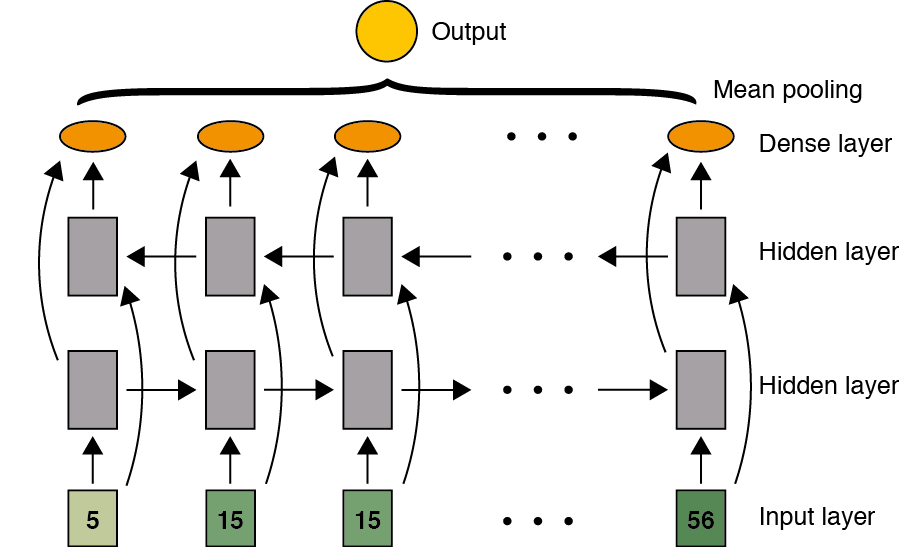

Cuối cùng, có tất cả các cách cải tiến mà người ta có thể sử dụng để tạo ra một deep network, chẳng hạn như xếp chồng và chèn các lớp dense giữa các ngăn xếp và ở đầu mạng. Ngoài những thứ này, tác giả đã bao gồm một lớp tuyến tính để giảm kích thước của các vectơ đặc trưng từ 22 xuống 16, một phần để bảo vệ khỏi việc overfitting và một phần do các mô hình bắt đầu mất quá nhiều thời gian để training:

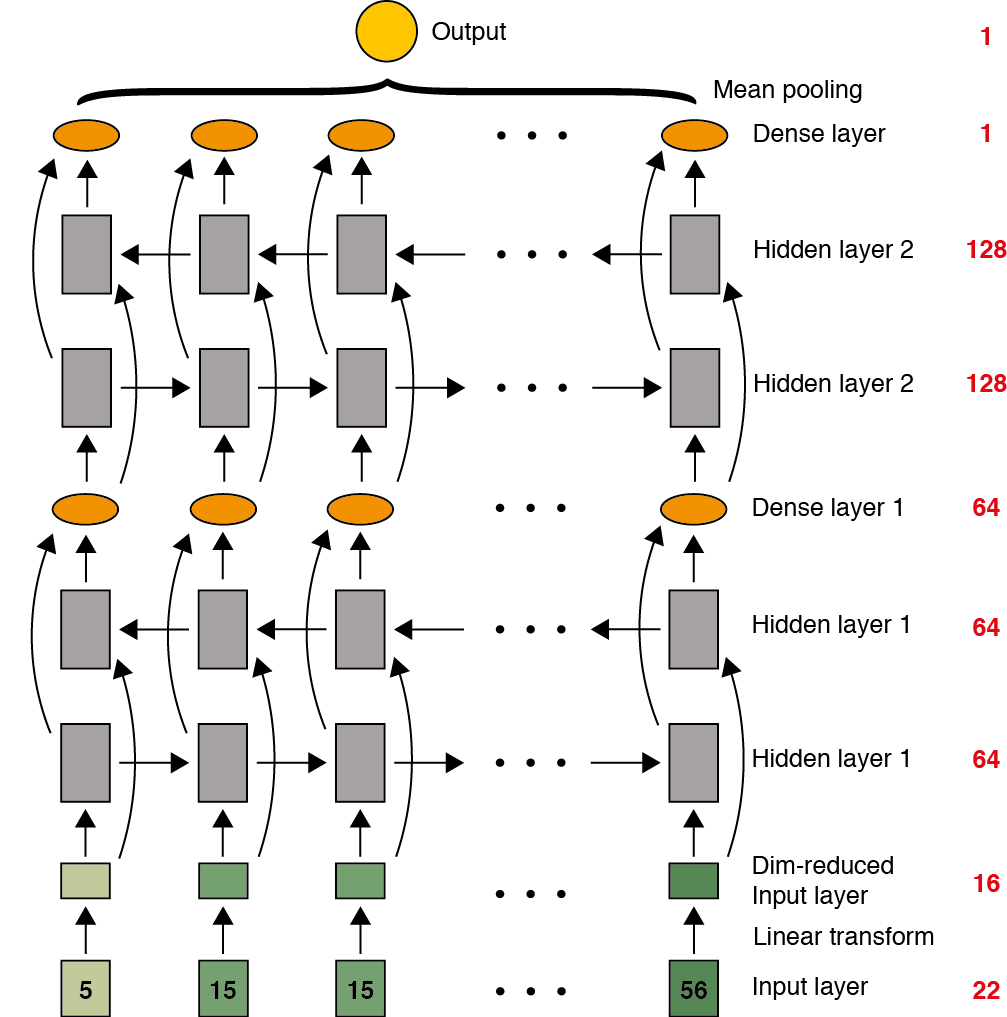

Deep RNN hai ngăn xếp. Các con số màu đỏ cho biết số lượng đơn vị trong mỗi lớp. Mô hình phù hợp nhất trong cuộc thi là phiên bản sâu năm ngăn xếp của kiến trúc trên với số lượng đơn vị từ dưới lên trên là (64, 128, 256, 128, 64).

Kiến trúc hoạt động tốt nhất mà tác giả tìm thấy trong cuộc thi là RNN hai chiều xếp chồng sâu 5 lớp với 64-256 hidden node, với một lớp dense bổ sung sau mỗi ngăn xếp ẩn. 




#### Chạy mô hình LSTM 


##### Chuẩn bị 

Import các layer để xây dựng mạng LSTM

In [ ]:
from keras.layers import (
    Input,
    Dense,
    LSTM,
    AveragePooling1D,
    TimeDistributed,
    Flatten,
    Bidirectional,
    Dropout
)
from keras.models import Model

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
# Dừng training khi model training không hiệu quả
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)
# Giảm tốc độ training khi metric không cải thiện 
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_delta=0.01)

In [ ]:
# số lượng sample trong một lần train 
BATCH_SIZE = 1024
# số lần train toàn bộ tập train 
N_EPOCHS = 30

##### Xây dựng mô hình

LSTM (Long Short-Term Memory) thể hiện được sự ưu việt ở điểm có thể nhớ được nhiều bước hơn mô hình RNN truyền thống. Nhưng bạn không cần phải quá lo lắng vì LSTM về cơ bản giống với cấu trúc của RNN truyền thống, chúng chỉ khác nhau ở cách tính toán của các nút ẩn. 

I actually started out with Long-Short Term Memory (LSTM) units but, in order to reduce the training time, switched to ordinary RNNs with fully connected layers, which turned out to be just as effective. My guess is that the advantages of LSTMs are only really apparent for much longer sequences than the radar sequences in this competition.

In [ ]:
# build neutron network
def get_model_deep(shape=(19, 22)):
    # Lớp đầu vào nhận ma trận kích thước 19*22
    inp = Input(shape)
    # Lớp giảm số lượng feature xuống 16 để giảm thời gian training 
    x = Dense(16)(inp)
    # Mạng LSTM 2 chiều 64 node ẩn
    x = Bidirectional(LSTM(64, return_sequences=True))(x)
    # This wrapper allows to apply a layer to every temporal slice of an input.
    x = TimeDistributed(Dense(64))(x)
    # Mạng LSTM 2 chiều 128 node ẩn
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    # This wrapper allows to apply a layer to every temporal slice of an input.
    x = TimeDistributed(Dense(1))(x)
    # Average pooling for temporal data
    x = AveragePooling1D()(x)
    # Làm phằng đầu vào. Biến ma trận thành vector 1 chiều 
    x = Flatten()(x)
    # dropout là quá trình loại bỏ tạm thời một nơ-ron khỏi quá trình training, quá trình này sẽ làm thay đổi weight khác so với bình thường. 
    x = Dropout(0.5)(x)
    # Just your regular densely-connected NN layer. (linear activation)
    x = Dense(1)(x)

    model = Model(inp, x)
    return model

In [ ]:
model = get_model_deep((19,22))
# Adam optimizer được sử dụng nhiều hơn cả do khả năng hội tụ nhanh của nó.
# MAE là một loss function được sử dụng cho các mô hình hồi quy, 
model.compile(optimizer='adam', loss='mae',)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 19, 22)]          0         
                                                                 
 dense (Dense)               (None, 19, 16)            368       
                                                                 
 bidirectional (Bidirectiona  (None, 19, 128)          41472     
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 19, 64)           8256      
 ibuted)                                                         
                                                                 
 bidirectional_1 (Bidirectio  (None, 19, 256)          197632    
 nal)                                                            
                                                             

##### Huấn luyện mô hình

In [ ]:
model.fit(X_train, y_train, 
            batch_size=BATCH_SIZE, epochs=N_EPOCHS, 
            validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/30
559/559 [==============================] - 606s 1s/step - loss: 2.5500 - val_loss: 2.4807 - lr: 0.0010
Epoch 2/30
559/559 [==============================] - 587s 1s/step - loss: 2.4373 - val_loss: 2.4681 - lr: 0.0010
Epoch 3/30
559/559 [==============================] - 593s 1s/step - loss: 2.4173 - val_loss: 2.4511 - lr: 0.0010
Epoch 4/30
559/559 [==============================] - 588s 1s/step - loss: 2.4013 - val_loss: 2.4425 - lr: 0.0010
Epoch 5/30
559/559 [==============================] - 587s 1s/step - loss: 2.3923 - val_loss: 2.4307 - lr: 0.0010
Epoch 6/30
559/559 [==============================] - 586s 1s/step - loss: 2.3912 - val_loss: 2.4398 - lr: 0.0010
Epoch 7/30
559/559 [==============================] - 591s 1s/step - loss: 2.3877 - val_loss: 2.4284 - lr: 0.0010
Epoch 8/30
559/559 [==============================] - 590s 1s/step - loss: 2.3814 - val_loss: 2.4287 - lr: 0.0010
Epoch 9/30
559/559 [==============================] - 588s 1s/step - loss: 2.3592 - val_

##### Dự đoán tập test

In [ ]:
y_pred = model.predict(X_test, batch_size=BATCH_SIZE)
submission = pd.DataFrame({'Id': test_ids, 'Expected': y_pred.reshape(-1)})
submission.to_csv('submission.csv', index=False)

## Nhìn lại quá trình làm đồ án

- Nhóm em gặp nhiều khó khăn như chỉnh sửa lại source code để có thể chạy được, kích thước dữ liệu khá lớn gây khó khăn trong việc đọc, giải pháp của tác giả bằng tiếng anh có nhiều chỗ khó hiểu và quá trình training lâu, dễ bị ngắt giữa chừng.
- Qua đồ án này, nhóm em học thêm được nhiều về mạng neuron nhân tạo, mạng RNN và LSTM, cách chúng nhận đầu vào, đi qua các hidden node, cách xử lí và đưa ra kết quả cuối cùng. 
- Nếu có thêm thời gian, nhóm sẽ cài đặt lại phương án hoàn chỉnh của tác giả.

## Tài liệu tham khảo

[link1](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiM973N1tT4AhUuqVYBHX5_CBwQFnoECAkQAQ&url=https%3A%2F%2Fviblo.asia%2Fp%2Frecurrent-neural-network-tu-rnn-den-lstm-gGJ597z1ZX2&usg=AOvVaw1Huk9g8-E6D-LEk5SmYZxh)
[link2](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiM973N1tT4AhUuqVYBHX5_CBwQFnoECAYQAQ&url=https%3A%2F%2Fnttuan8.com%2Fbai-14-long-short-term-memory-lstm%2F&usg=AOvVaw0PzASEWVObqTDPYaRbaa8R)
[link3](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiM973N1tT4AhUuqVYBHX5_CBwQFnoECC4QAQ&url=https%3A%2F%2Fdominhhai.github.io%2Fvi%2F2017%2F10%2Fwhat-is-lstm%2F&usg=AOvVaw3N-HHt0PliN7K6_9jayIei)
[link4](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiM973N1tT4AhUuqVYBHX5_CBwQFnoECB0QAQ&url=https%3A%2F%2Fwww.noron.vn%2Fpost%2Fnhung-cai-tien-cua-mang-lstm-so-voi-mang-rnn-la-gi-1494wdz4y74jn&usg=AOvVaw1sP2WpgHLCUOB3zicNH-fm)